Física Computacional
-------------------------------------
### Tarea 4: Diferenciación automática


***Profesor***: Francisco Peñuñuri Anguniano

***Alumno***: Saul Eliseo Gamboa León


In [227]:
using Plots
function rk4_system(f::Function, α::Array, a::Real, b::Real, N::Int64)
    n1 = N + 1
    m = size(α)[1]
    u = zeros(n1, m + 1)
    h = (b - a) / N
    u[1,1] = a
    u[1,2:end] = α
    for i in 2:n1
        t = u[i-1,1]
        v = u[i-1,2:end]
        k1 = h * f(t, v)
        k2 = h * f(t + h / 2, v .+ k1 / 2)
        k3 = h * f(t + h / 2, v .+ k2 / 2)
        k4 = h * f(t + h, v .+ k3)
        u[i,2:end] = v .+ (k1 .+ 2 .* k2 .+ 2 .* k3 .+ k4) ./ 6
        u[i,1] = a + (i - 1) * h
    end
    return u
end

rk4_system (generic function with 1 method)

### Problema 1a
$$
y'' + sin(x y' y) + 2x = 5
$$


$$
y_1 = y \quad y_2 = y' 
$$

$$
y_1' = y_2
$$


$$
y_2' = 5 - 2x - sin(x y' y)
$$

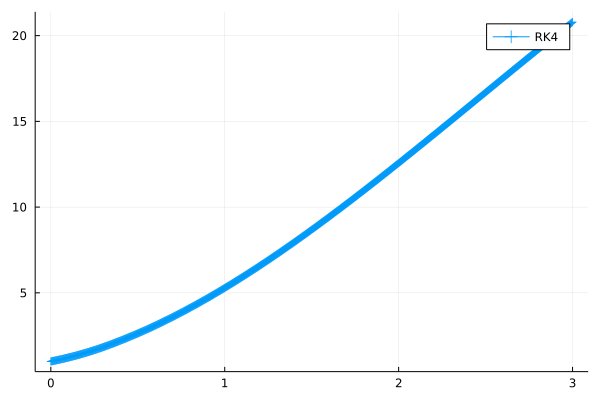

In [228]:
f(x,y) = [ y[2] , 5 - 2*x  + sin( x*y[1]*y[2]) ]
init_con = [1.0,2.0]
a = 0
b = 3
n = 1000
sol = rk4_system(f,init_con,a,b,n)

plot(sol[:,1],sol[:,2],markershape=:+,label="RK4")

### Problema 1b

$$
y^{(4)} + sin(x y^{(3)}) +   e^{-x} y'' - x y = 0 
$$


$$
y_1 = y \quad y_2 = y' \quad y_3 = y'' \quad y_4 = y'''  
$$

$$
y_1' = y_2
$$

$$
y_2' = y_3
$$

$$
y_3' = y_4
$$

$$
y_4' = x y_1 - y_2 - e^{-x} y_3 + sin( x y_4 )
$$

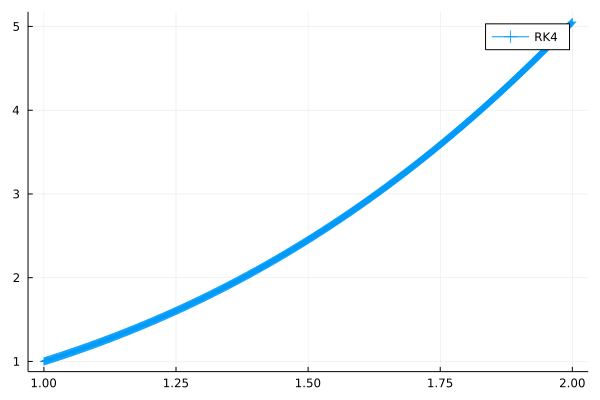

In [87]:
f(x,y) = [ y[2] , y[3]  , y[4] , x*y[1] - y[2] - exp(-x)*y[3] + sin(x*y[4]) ]
init_con = [1.0,2.0,3.0,4.0]
a = 1
b = 2
n = 1000
sol = rk4_system(f,init_con,a,b,n)

plot(sol[:,1],sol[:,2],markershape=:+,label="RK4")

### Problema 2

$$
f_1(t,\theta, \omega) = \omega 
$$

$$
f_2(t,\theta, \omega) = -\frac{c}{m} \omega + \frac{g}{l} sin(\theta)
$$

Tensión

$$
T(t) = m g cos\theta(t)
$$

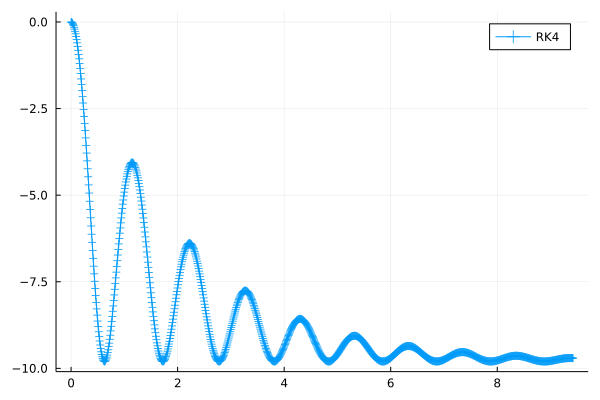

In [242]:
m = 1 
l = 1
g = 9.8
c = 0.5

f(x,y) = [ y[2] , -(c/m)*y[2] + (g/l)*sin(y[1]) ]
init_con = [π/2,0.0]
a = 0
b = 3π
n = 1000

sol = rk4_system(f,init_con,a,b,n)

plot(sol[:,1],m*g*cos.(sol[:,2]),markershape=:+,label="RK4")

### Problema 3

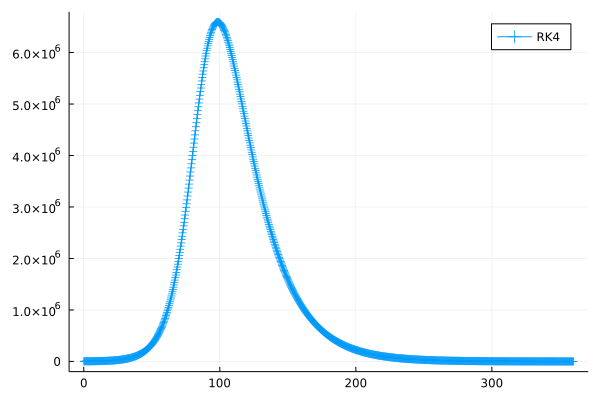

In [219]:
β = 0.2;
ϵe = 0.3;
ϵq = 0;
ϵj = 0.1;
μ = 0.000034;
λ = 408.09;
p = 0;
k1 = 0.1;
k2 = 0.125;
d1 = 0.0079;
d2 = 0.0068;
σ1 = 0.0337;
σ2  = 0.0386;
tf = 360;
B1 = 1;
B2 = 1;
B3 = 1;
B4 = 1;
C1 = 300;
C2 = 600;

f(x,y) = 
[ λ - y[1]*(β*y[4] + ϵe*β*y[2] + ϵq*β*y[3] + ϵj*β*y[5])/( y[1]+y[2]+y[3]+y[4]+y[5]+y[6] ) - μ*y[1], 
p + y[1]*(β*y[4] + ϵe*β*y[2] + ϵq*β*y[3] + ϵj*β*y[5])/( y[1]+y[2]+y[3]+y[4]+y[5]+y[6] ) - (k1+μ)*y[2] ,
-(k2+μ)*y[3] ,
k1*y[2] - (d1 + σ1 + μ)*y[4],
k2*y[3] - (d2 + σ2 + μ)*y[5] , 
σ1*y[4] + σ2*y[5] - μ*y[6] ]


init_con = [12000000,1565,292,695,326,20]
a = 0
b = 360
n = 1000

sol = rk4_system(f,init_con,a,b,n);

plot(sol[:,1],sol[:,3]+sol[:,4]+sol[:,5]+sol[:,6],markershape=:+,label="RK4")

## Problema 4
### Números duales

$$
d =  f_0 + \epsilon f_1 \qquad \epsilon \neq 0 \quad \epsilon^2 = 0
$$


In [220]:
struct dual1
    f0
    f1
end

In [222]:
# Operadores
import Base: + , - , * , ^ 
x::dual1 + y::dual1  = dual1(x.f0 + y.f0, x.f1 + y.f1)
x::dual1 - y::dual1  = dual1(x.f0 - y.f0, x.f1 - y.f1)
x::dual1 * y::dual1  = dual1(x.f0 * y.f0, x.f1 * y.f0 + x.f0 * y.f1)
x::dual1 ^ y::dual1 = dual1(x.f0 .^ y.f0, (x.f0 .^ (y.f0-1)) .* (y.f1.*log(x.f0 ).*x.f0 + y.f0.*x.f1) )
x::dual1 / y::dual1 = dual1(x.f0 / y.f0, (x.f1*y.f0 - y.f1*x.f0) / y.f0^2)

#Funciones
import Base:  acos, acosh, asin, asinh, atan , atanh, sin, cos
acos(x::dual1) = dual1(acos(x.f0), -x.f1 ./ (sqrt(1-(x.f0)^2)))
acosh(x::dual1) = dual1(acosh(x.f0), x.f1 ./ (sqrt((x.f0)^2-1)))
asin(x::dual1) = dual1(asin(x.f0), x.f1 ./ (sqrt(1-(x.f0)^2)))
asinh(x::dual1) = dual1(asinh(x.f0), x.f1 ./ (sqrt((x.f0)^2+1)))
atan(x::dual1) = dual1(atan(x.f0), x.f1 ./ (1+(x.f0)^2))
atanh(x::dual1) = dual1(atanh(x.f0), x.f1 ./ (1-(x.f0)^2))
sin(x::dual1) = dual1(sin(x.f0), x.f1.*cos(x.f0))
cos(x::dual1) = dual1(cos(x.f0), -sin(x.f0) .* x.f1)

import Base: cosh, sinh, tan, tanh, exp, log, sqrt, abs
cosh(x::dual1) = dual1(cosh(x.f0), x.f1.*sinh(x.f0))
sinh(x::dual1) = dual1(sinh(x.f0), x.f1.*cosh(x.f0))
tan(x::dual1) = dual1(tan(x.f0), x.f1 ./ ((cos(x.f0))^2))
tanh(x::dual1) = dual1(tan(x.f0), x.f1 ./ ((cos(x.f0))^2))
exp(x::dual1) = dual1(exp(x.f0), x.f1.*exp(x.f0))
log(x::dual1) = dual1(log(x.f0), x.f1 ./ x.f0)
sqrt(x::dual1) = dual1(sqrt(x.f0), x.f1 ./ (2*sqrt(x.f0)))
abs(x::dual1) = dual1(abs(x.f0), (x.f0./abs(x.f0)).*x.f1)

abs (generic function with 17 methods)

In [223]:
a = dual1(1,1)
b = dual1(1,2)
c = dual1(2,2)

dual1(2, 2)

In [224]:
(a + c)*b

dual1(3, 9)

In [225]:
a^b

dual1(1, 1.0)

In [226]:
sinh(a)

dual1(1.1752011936438014, 1.5430806348152437)